In [1]:
import pandas as pd
pd.set_option("display.max_columns",999) # display all columns
pd.set_option("display.max_rows", 999)

from pymatgen.analysis.local_env import BrunnerNN_reciprocal, BrunnerNN_relative, BrunnerNN_real, EconNN, JMolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, VoronoiNN_modified, CrystalNN
from materialscoord.core import Benchmark, HumanInterpreter, NbFuncs

methods = [BrunnerNN_reciprocal(), BrunnerNN_relative(), BrunnerNN_real(), 
           EconNN(), JMolNN(), MinimumDistanceNN(), MinimumOKeeffeNN(), 
           VoronoiNN(), VoronoiNN_modified(), CrystalNN(), HumanInterpreter()]
structure_groups = ["zeolites"]
bm = Benchmark(methods=methods, structure_groups=structure_groups, unique_sites=True,
               use_weights=False, cation_anion=True, anion_cation=False)
bm.benchmark()

/Users/hillarypan/AJResearch/cn_routines/codes/pymatgen/pymatgen/__init__.py:87: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


Initialization successful.


In [2]:
report = bm.report()
report

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_relative0,BrunnerNN_relative1,CrystalNN0,CrystalNN1,EconNN0,EconNN1,HumanInterpreter0,HumanInterpreter1,JMolNN0,JMolNN1,MinimumDistanceNN0,MinimumDistanceNN1,MinimumOKeeffeNN0,MinimumOKeeffeNN1,VoronoiNN0,VoronoiNN1,VoronoiNN_modified0,VoronoiNN_modified1
AlPO4_91671,{u'O': 23.0},{u'O': 20.0},{u'O': 4.0},{u'O': 4.0},{u'O': 23.0},{u'O': 20.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 2.0},{u'O': 4.0},{u'O': 2.0},{u'O': 7.0},{u'O': 7.0},{u'O': 4.0},{u'O': 4.0}
SiO2_413210,{u'O': 22.0},{u'O': 19.0},{u'O': 4.0},{u'O': 4.0},{u'O': 22.0},{u'O': 19.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 4.0},{u'O': 7.0},{u'O': 8.0},{u'O': 4.0},{u'O': 4.0}


In [3]:
nbf = NbFuncs(bm)
df = nbf.final()
df

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,VoronoiNN,VoronoiNN_modified
AlPO4_91671,17.5,0.0,17.5,0.0,0.0,0.0,1.0,1.0,3.0,0.0
SiO2_413210,16.5,0.0,16.5,0.0,0.0,0.0,0.0,0.0,3.5,0.0
Total,34.0,0.0,34.0,0.0,0.0,0.0,1.0,1.0,6.5,0.0


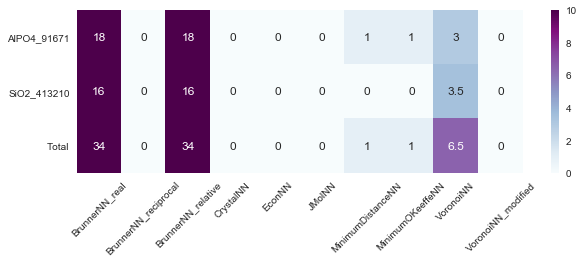

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 3))

sns.set(font='Times New Roman')
sns.set(font_scale=1)

hm = sns.heatmap(df, annot=True, cmap="BuPu", vmax=10)

ax.set_xticklabels(df.columns.tolist(), rotation=45)
ax.set_yticklabels(df.index.tolist())

plt.savefig('zeolites.png')
plt.show()